<a href="https://colab.research.google.com/github/riblidezso/wigner_dl_demo/blob/master/nb_01_baby_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Baby steps in deep learning



### Load useful python packages

In [1]:
# plotting and numerical basics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# machine learning baselines
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [0]:
# keras deep learning framework (with tensorflow backend)
import keras
from keras.models import Model
import keras.layers as kl
import keras.regularizers as kr
import keras.optimizers as ko

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# MNIST handwritten digits dataset

In [0]:
from keras.datasets import mnist
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Check some handwritten digits

Label: 9


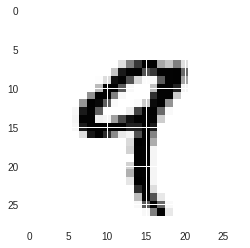

In [56]:
i = 4
imshow(x_train[i])
print('Label:', y_train[i] )

### Some more info about the dataset

In [57]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Normalize pixel values to 0-1 range

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

## Define functions for 'simple' machine learning baselines

In [0]:
def train_baseline(model, x_train, y_train, N_train=60000, **kwargs):
  """Train a baseline sklearn model."""
  x_train_flat = x_train.reshape(x_train.shape[0],-1)  # flatten
  clf = model(**kwargs)  # init machine learning model
  clf.fit(x_train_flat[:N_train],y_train[:N_train])  # train it
  return clf


def test_baseline(clf, x_test, y_test):
  """Evaluate a baseline sklearn model."""
  x_test_flat = x_test.reshape(x_test.shape[0],-1)  # flatten
  y_pred = clf.predict(x_test_flat)  # make predictions
  acc = np.equal(y_pred, y_test).mean()  # calculate accuracy
  print(clf.__class__.__name__, 'accuracy',acc)

### Test logistic regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)

In [91]:
%%time
clf = train_baseline(LogisticRegression, x_train, y_train)
test_baseline(clf, x_test, y_test)

LogisticRegression accuracy 0.9201
CPU times: user 2min 21s, sys: 95.8 ms, total: 2min 21s
Wall time: 2min 21s


### Test Random Forest

[Random Forest](https://en.wikipedia.org/wiki/Random_forest)

In [95]:
%%time
clf = train_baseline(RandomForestClassifier, x_train, y_train,
                    n_jobs=-1, n_estimators = 300)
test_baseline(clf, x_test, y_test)

RandomForestClassifier accuracy 0.971
CPU times: user 4min 14s, sys: 448 ms, total: 4min 15s
Wall time: 2min 10s


### Test a simple neural network

In [105]:
%%time
clf = train_baseline(MLPClassifier, x_train, y_train)
test_baseline(clf, x_test, y_test)

MLPClassifier accuracy 0.9776
CPU times: user 2min 11s, sys: 39.3 s, total: 2min 50s
Wall time: 1min 26s


In [106]:
# see the params
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### Implement our own neural network for more control!

In [151]:
N1 = 100
inp = kl.Input(shape=(28*28,),name='input')  # the input data tensor
x = kl.Dense(N1, activation='relu')(inp)  # first dense layer
x = kl.Dense(10, activation='softmax')(x)  # prediction layer
clf = Model(inputs=inp, outputs=x)  # define the model
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [153]:
# Train it
clf.fit(x_train.reshape(x_train.shape[0],-1), y_train, epochs=10,batch_size=256,
        validation_data=(x_test.reshape(x_test.shape[0],-1), y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4828 - acc: 0.8703 - val_loss: 0.2485 - val_acc: 0.9317
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2171 - acc: 0.9395 - val_loss: 0.1824 - val_acc: 0.9470
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1635 - acc: 0.9539 - val_loss: 0.1457 - val_acc: 0.9582
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1323 - acc: 0.9628 - val_loss: 0.1264 - val_acc: 0.9621
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1109 - acc: 0.9688 - val_loss: 0.1153 - val_acc: 0.9654
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0949 - acc: 0.9734 - val_loss: 0.1058 - val_acc: 0.9684
Epoch 7/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0828 - acc: 0.9767 - val_loss: 0.0991 - val_acc

## Try a larger network? 

In [154]:
N1,N2 = 1024,512
inp = kl.Input(shape=(28*28,),name='input')
x = kl.Dense(N1, activation='relu')(inp)  # first dense layer
x = kl.Dropout(0.5)(x)
x = kl.Dense(N2, activation='relu')(x)  # first dense layer
x = kl.Dropout(0.25)(x)
x = kl.Dense(10, activation='softmax')(x)  #prediction layers
clf = Model(inputs=inp, outputs=x)
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_24 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [156]:
# Train it
clf.fit(x_train.reshape(x_train.shape[0],-1),y_train, epochs=10, batch_size=256,
        validation_data=(x_test.reshape(x_test.shape[0],-1), y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.3121 - acc: 0.9073 - val_loss: 0.1112 - val_acc: 0.9663
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1312 - acc: 0.9605 - val_loss: 0.0808 - val_acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0993 - acc: 0.9685 - val_loss: 0.0826 - val_acc: 0.9739
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0804 - acc: 0.9747 - val_loss: 0.0646 - val_acc: 0.9805
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0692 - acc: 0.9783 - val_loss: 0.0652 - val_acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0594 - acc: 0.9814 - val_loss: 0.0618 - val_acc: 0.9817
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0543 - acc: 0.9826 - val_loss: 0.0619 - val_acc

# Convolutional neural networks!

In [0]:
# need to create 1 ' color channel'
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [160]:
N1,N2,N3 = 32,64,128
inp = kl.Input(shape=(28,28,1),name='input')
x = kl.Conv2D(N1, kernel_size=(3, 3), activation='relu')(inp)
x = kl.Conv2D(N1, (3, 3), activation='relu')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x = kl.Conv2D(N2, (3, 3), activation='relu')(x)
x = kl.Conv2D(N2, (3, 3), activation='relu')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x = kl.Dropout(0.25)(x)
x = kl.Flatten()(x)
x = kl.Dense(N3, activation='relu')(x)  # first dense layer
x = kl.Dropout(0.5)(x)
x = kl.Dense(10, activation='softmax')(x)  #prediction layers
clf = Model(inputs=inp, outputs=x)
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 64)          0         
__________

In [161]:
# Train it
clf.fit(x_train,y_train, epochs=10, validation_split=0.1, batch_size=256,
        validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 142us/step - loss: 0.3722 - acc: 0.8816 - val_loss: 0.0545 - val_acc: 0.9824
Epoch 2/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0936 - acc: 0.9719 - val_loss: 0.0352 - val_acc: 0.9877
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0660 - acc: 0.9799 - val_loss: 0.0280 - val_acc: 0.9910
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0515 - acc: 0.9841 - val_loss: 0.0269 - val_acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0448 - acc: 0.9869 - val_loss: 0.0262 - val_acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0393 - acc: 0.9882 - val_loss: 0.0260 - val_acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0345 - acc: 0.9896 - val_loss: 0.0249 - 

---


# 97.5 or 99.4 meh? Let's see a more impressive example: CIFAR10

[CIFAR10 website](https://www.cs.toronto.edu/~kriz/cifar.html)

In [0]:
from keras.datasets import cifar10
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
mnist_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                 'horse','ship', 'truck']

## Test yourself at home! 

I can do around 96%

Label: horse


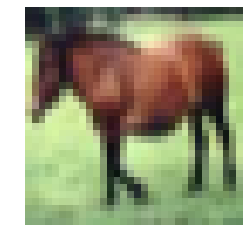

In [176]:
i = 7
imshow(x_train[i])
plt.axis('off')
print('Label:', mnist_classes[ int(y_train[i]) ])

#### Some info

In [177]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### Normalize data again

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

### Baselines

In [0]:
%%time
clf = train_baseline(LogisticRegression, x_train, y_train.flatten(),
                     N_train = 1000)
test_baseline(clf, x_test, y_test.flatten())

In [181]:
%%time
clf = train_baseline(RandomForestClassifier, x_train, y_train.flatten(),
                    n_jobs=-1, n_estimators = 100)
test_baseline(clf, x_test, y_test.flatten())

RandomForestClassifier accuracy 0.467
CPU times: user 6min 44s, sys: 0 ns, total: 6min 44s
Wall time: 3min 26s


### OK, so this is much harder. Let's see neural nets!

In [179]:
y_train.shape

(50000, 1)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 218us/step - loss: 0.2622 - acc: 0.9190 - val_loss: 0.0611 - val_acc: 0.9798
Epoch 2/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0885 - acc: 0.9736 - val_loss: 0.0382 - val_acc: 0.9866
Epoch 3/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0643 - acc: 0.9810 - val_loss: 0.0336 - val_acc: 0.9893
Epoch 4/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0538 - acc: 0.9844 - val_loss: 0.0306 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0468 - acc: 0.9862 - val_loss: 0.0320 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0422 - acc: 0.9871 - val_loss: 0.0321 - val_acc: 0.9889
Epoch 7/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0375 - acc: 0.9886 - val_loss: 0.0282 -